<a href="https://colab.research.google.com/github/rg2121/computer-vision-projects/blob/main/pose_detection_algorithim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


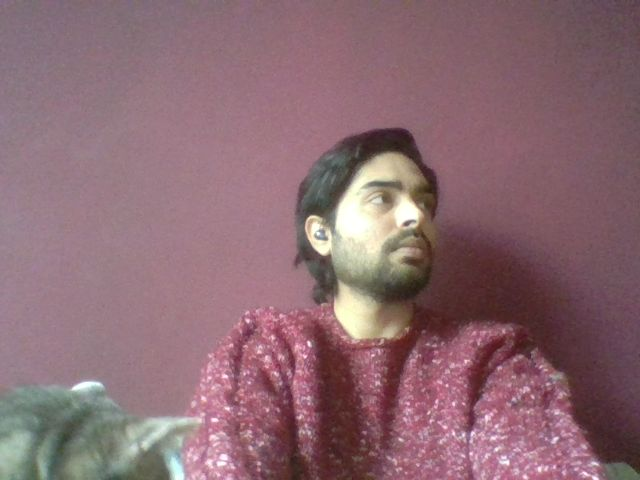

In [52]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [1]:
%%capture
!pip install ultralytics

In [54]:
class Working_area:
    def __init__(self, im,):
        xc=im.shape[1]//2
        yc=im.shape[0]//2
        self.im = im
        self.im_draw = im.copy()
        s= 100
        self.x1 = xc-s
        self.y1 = yc-s
        self.x2 = xc+s
        self.y2 = yc+s
    def inside_outside(self,x,y):
        cv2.rectangle(self.im_draw, (self.x1,self.y1), (self.x2,self.y2), (255,255,0), 1)
        cv2.circle(self.im_draw, (x,y), 5, (0,255,0), -1)
        if (self.x1<=x<=self.x2) and (self.y1<=y<=self.y2):
            return True
        else:
            return False



No person detected or the person is distracted.


array([[[133, 109, 135],
        [131, 107, 133],
        [129, 105, 129],
        ...,
        [ 96,  72,  85],
        [ 97,  73,  86],
        [ 93,  69,  82]],

       [[132, 108, 134],
        [130, 106, 130],
        [129, 105, 129],
        ...,
        [ 94,  70,  83],
        [ 95,  71,  84],
        [ 91,  67,  80]],

       [[133, 109, 133],
        [132, 108, 130],
        [130, 106, 128],
        ...,
        [ 92,  69,  79],
        [ 92,  68,  81],
        [ 89,  65,  78]],

       ...,

       [[131, 154, 128],
        [132, 155, 129],
        [135, 158, 132],
        ...,
        [ 94, 105,  88],
        [ 90, 101,  84],
        [ 85,  96,  79]],

       [[131, 155, 129],
        [132, 156, 130],
        [135, 159, 133],
        ...,
        [ 92, 103,  87],
        [ 89, 100,  84],
        [ 89, 100,  84]],

       [[133, 157, 131],
        [135, 159, 133],
        [136, 162, 135],
        ...,
        [ 88,  99,  83],
        [ 91, 102,  86],
        [ 98, 109,  93]]], dtype=uint8)
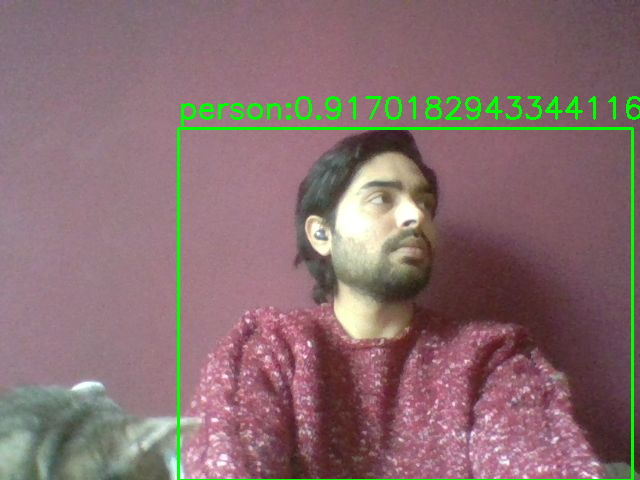

In [60]:
from ultralytics import YOLO
import cv2
import numpy as np

#Reading the image in python
im = cv2.imread("photo.jpg", cv2.IMREAD_COLOR) #BGR
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# #class GetKeypoint(BaseModel):    #keypoints to know which part of the body do we want to detect
#     NOSE:           int = 0
#     LEFT_EYE:       int = 1
#     RIGHT_EYE:      int = 2
#     LEFT_EAR:       int = 3
#     RIGHT_EAR:      int = 4
#     LEFT_SHOULDER:  int = 5
#     RIGHT_SHOULDER: int = 6
#     LEFT_ELBOW:     int = 7
#     RIGHT_ELBOW:    int = 8
#     LEFT_WRIST:     int = 9
#     RIGHT_WRIST:    int = 10
#     LEFT_HIP:       int = 11
#     RIGHT_HIP:      int = 12
#     LEFT_KNEE:      int = 13
#     RIGHT_KNEE:     int = 14
#     LEFT_ANKLE:     int = 15
#     RIGHT_ANKLE:    int = 16

class Dectector_class:
    def __init__(self):
        self.model =YOLO("yolo11n-pose.pt") #n,s,m,l,x  #Load the model for doing something
        self.Working_area = Working_area(im)

    def result_of_detection(self, im):
        res = False
        results = self.model.predict(im, verbose = False)    #pridiction and verbose is false because I want the result to be clean

        #Iterate oover the images
        for result in results:

            # is there a person in the image
            for i in range(0, len(result.boxes)):
                x,y,w,h = result.boxes.xyxy.cpu().numpy()[i]
                id = result.boxes.cls.cpu().numpy()[i]
                score = result.boxes.conf.cpu().numpy()[i]
                cv2.putText(im, f"{result.names[id]}:{score}", (int(x),int(y-10)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
                cv2.rectangle(im, (int(x),int(y)), (int(w),int(h)), (0,255,0), 2)
                NOSE = result.keypoints.xy.cpu().numpy()[i][0].astype(np.int32)
                LEFT_EYE = result.keypoints.xy.cpu().numpy()[i][1].astype(np.int32)
                RIGHT_EYE = result.keypoints.xy.cpu().numpy()[i][2].astype(np.int32)
                LEFT_EAR = result.keypoints.xy.cpu().numpy()[i][3].astype(np.int32)
                RIGHT_EAR = result.keypoints.xy.cpu().numpy()[i][4].astype(np.int32)
                        #LEFT_SHOULDER = result.keypoints.xy.cpu().numpy()[i][5].astype(np.int32)
                        #RIGHT_SHOULDER = result.keypoints.xy.cpu().numpy()[i][6].astype(np.int32)
                        #LEFT_ELBOW = result.keypoints.xy.cpu().numpy()[i][7].astype(np.int32)
                        #RIGHT_ELBOW = result.keypoints.xy.cpu().numpy()[i][8].astype(np.int32)
                        #LEFT_WRIST = result.keypoints.xy.cpu().numpy()[i][9].astype(np.int32)
                        #RIGHT_WRIST = result.keypoints.xy.cpu().numpy()[i][10].astype(np.int32)
                        #LEFT_HIP = result.keypoints.xy.cpu()[i].numpy()[11].astype(np.int32)
                        #RIGHT_HIP = result.keypoints.xy.cpu()[i].numpy()[12].astype(np.int32)
                        #LEFT_KNEE = result.keypoints.xy.cpu()[i].numpy()[13].astype(np.int32)
                        #RIGHT_KNEE= result.keypoints.xy.cpu()[i].numpy()[14].astype(np.int32)
                        #LEFT_ANKLE = result.keypoints.xy.cpu()[i].numpy()[15].astype(np.int32)
                        #RIGHT_ANKLE = result.keypoints.xy.cpu()[i].numpy()[16].astype(np.int32)

                #now we see if the nose, eyes, ears are inside the box that we created with the class worker

                w = Working_area(im)
                res_nose = w.inside_outside(NOSE[0],NOSE[1])
                #res_earl = w.inside_outside(LEFT_EAR[0],LEFT_EAR[1])
                #res_earr = w.inside_outside(RIGHT_EAR[0],RIGHT_EAR[1])
                res_eyel = w.inside_outside(LEFT_EYE[0],LEFT_EYE[1])
                res_eyer = w.inside_outside(RIGHT_EYE[0],RIGHT_EYE[1])
                if res_nose and res_eyel and res_eyer:
                    res = True
                    cv2.putText(im, f"Focused!", (int(x),int(y-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

                # else:
                #     print("Please, Focus!")



                #cv2.circle(im, ((NOSE[0]),(NOSE[1])), 5, (0,0,255), -1)
                #cv2.circle(im, ((LEFT_EYE[0]),(LEFT_EYE[1])), 5, (0,0,255), -1)
                #cv2.circle(im, ((RIGHT_EYE[0]),(RIGHT_EYE[1])), 5, (0,0,255), -1)
                #cv2.circle(im, ((LEFT_EAR[0]),(LEFT_EAR[1])), 5, (0,0,255), -1)
                #cv2.circle(im, ((RIGHT_EAR[0]),(RIGHT_EAR[1])), 5, (0,0,255), -1)
                #cv2.rectangle(im, (Worker.x1,Worker.y1), (self.x2,self.y2), (255,255,0), 1)

        return res, im



d = Dectector_class()
res, im = d.result_of_detection(im)
if res:
    print("The person is looking at the screen.")
else:
    print("No person detected or the person is distracted.")
im
